In [295]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [299]:
data = pd.read_csv("C:\\Users\Админ\\Desktop\\pandas\\train.csv")
target = data["TARGET"]

In [300]:
data[:3]

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low


In [301]:
data.drop(["building_id", "description", "manager_id", "display_address", "created", "TARGET", "Id", "listing_id"], 
          axis=1, inplace=True)

In [302]:
data["price"] = data["price"].apply(lambda x: np.log(x))

In [303]:
data.shape

(34546, 8)

In [304]:
data["photos"] = data["photos"].apply(lambda x: len((x).split(",")))

In [305]:
dt = dict()

for i in data["features"]:
    i = i.replace("'", "").replace("[", "").replace("]", "").replace(" ", "").split(",")
    for j in i:
        dt[j] = 1 if dt.get(j, -1) == -1 else dt[j] + 1

In [306]:
most_popular_features = []

for k, v in dt.items():
    if v >= 100:
        most_popular_features.append(k)

In [307]:
len(most_popular_features)

63

In [308]:
def get_feature(list_features):
    list_features = list_features.replace("'", "").replace("[", "").replace("]", "").replace(" ", "").split(",")
    for j in list_features:
        if j in most_popular_features:
            return j
    
    return "nn"

In [309]:
data["features"] = data["features"].apply(lambda x: get_feature(x))

In [310]:
address = data["street_address"]

In [311]:
dt_address = dict()

for i in address:
    dt_address[i] = 1 if dt_address.get(i, -1) == -1 else dt_address[i] + 1

In [312]:
most_popular_addresses = []

for k, v in dt_address.items():
    if v >= 40:
        most_popular_addresses.append(k)

In [313]:
len(most_popular_addresses)

44

In [314]:
address = address.apply(lambda x: x if x in most_popular_addresses else "na")

In [315]:
data.drop("street_address", axis=1, inplace=True)

In [316]:
data["street_address"] = address

In [317]:
data = pd.get_dummies(data)

In [318]:
data.info()

# 100 колонок стало после всех обработки признаков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 100 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   bathrooms                             34546 non-null  float64
 1   bedrooms                              34546 non-null  int64  
 2   latitude                              34546 non-null  float64
 3   longitude                             34546 non-null  float64
 4   photos                                34546 non-null  int64  
 5   price                                 34546 non-null  float64
 6   features_                             34546 non-null  uint8  
 7   features_Balcony                      34546 non-null  uint8  
 8   features_CatsAllowed                  34546 non-null  uint8  
 9   features_CommonOutdoorSpace           34546 non-null  uint8  
 10  features_DiningRoom                   34546 non-null  uint8  
 11  features_Dishw

In [319]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size= 0.3, random_state=42)

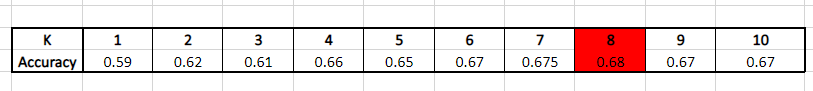

In [320]:
neigh = KNeighborsClassifier(n_neighbors=8)

In [321]:
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [322]:
y_pred = neigh.predict(x_test)

In [323]:
print(accuracy_score(y_test, y_pred))

0.6868004631416441


Вывод про данные:
Выкинул ненужные данные по типу айдишников и т д.
Выкинул признак "description" ибо там есть очень огромные и не ценные описания.
Обработал признак "photo", взял число(количество фото)
Обработал поле "features" и "street_address", применил one-hot кодирование, только выбирал не все фичии районы, а
только самые популярные.
Также прологорифмировал поле price, это дало очень небольшой, но прирост.

Вывод по моделированию:

Я выбрал модель логистической регрессии, на ней я получил точность очень низкую, порядка 56.
По итогу я решил выбрать KNN, анализ K приведён на картинке выше.